# Day 5: Feature Engineering: 

### ***EDA Summary from Yesterday***

### ***1. Overall Dataset Insights***

- **Top 10 Most Valuable Players:** Identified the highest-value players, mainly from top-tier clubs.
- **Market Value by Position:** Strikers and attacking midfielders generally have higher market value than defenders.
- **Teams with Highest Average Market Value:** Big clubs dominate, with high-value star players driving the averages.
- **Market Value Distribution:** Skewed towards a few expensive players; most players fall in the mid-range.
- **Age vs. Market Value:** Younger players, especially with high potential, tend to be valued higher.

### ***2. Player Attributes vs. Market Value***

- **Overall Rating Impact:** Strong correlation; higher overall ratings increase market value.
- **Individual Attributes Correlation:** Attributes like pace, stamina, and dribbling correlate with higher market values.
- **International Reputation Effect:** More stars (higher reputation) contribute to higher market value.
- **Potential Rating vs Market Value:** High potential players tend to have higher market values, though other factors also play a role.
- **Physical Attributes:** Attributes like height, weight, and strength show weaker correlations, with pace being more impactful.

### ***3. Position-Specific Insights***

- **CAM/CM vs CDM/CM:** Attacking midfielders are generally more valuable than defensive ones.
- **Pace and Wingers:** Strong positive correlation; pace increases value for wingers (LW/RW).
- **Goalkeepers:** Market value trends differ from outfield players, with goalkeepers generally being less expensive.

### ***4. Contract & Transfer Market Insights***

- **Contract End Year Impact:** Players with fewer years left on their contract typically have lower market values.
- **Loan vs Permanent:** Loan players are valued lower than permanent squad members.

In [71]:
import pandas as pd
import numpy as np 

In [72]:
df = pd.read_csv("../data/processed/data_after_eda.csv")

In [73]:
df.value_counts

<bound method DataFrame.value_counts of                         Name      ID  Age Best position  Best overall  \
0               K. De Winter  265774   22            CB            74   
1              Andrey Santos  273018   20            CM            78   
2                 G. Simeone  253396   21            ST            77   
3                   M. Melia  276346   16            ST            64   
4               K. De Bruyne  192985   33            CM            89   
5            Y. Ndayishimiye  255533   25            CB            78   
6              Nico González  255069   22            CM            79   
7                 E. Breivik  246063   24            CM            69   
8            M. Lewis-Skelly  278773   17            CM            64   
9                 K. Havertz  235790   25           CAM            85   
10                 S. Castro  267861   19            ST            77   
11          G. Kochorashvili  260813   25            CM            73   
12         

In [74]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)


## 1. Structuring the Dataset for Feature Engineering|

In [75]:
df.isnull().sum()

Name                           0
ID                             0
Age                            0
Best position                  0
Best overall                   0
Overall rating                 0
Potential                      0
Growth                      1285
foot                           0
Team                           0
Value                         86
Wage                          76
Release clause               600
Height_cm                      0
Weight_kg                      0
Acceleration                   0
Sprint speed                   0
Agility                        3
Reactions                      0
Balance                        3
Stamina                        0
Strength                       0
Jumping                        3
Total attacking                0
Crossing                       0
Finishing                      0
Heading accuracy               0
Short passing                  0
Volleys                        3
Total skill                    0
Dribbling 

In [76]:
df[df['Value'].isnull()]

Name      ID  Age Best position  Best overall  \
183            D. Lainez  237995   24            LM            77   
192             I. Reyes  252008   24           CDM            76   
311              A. Afif  234051   27            LM            78   
423            H. Martín  224151   31            ST            79   
487            L. Chávez  222382   28            CM            79   
589       Z. Ibrahimović   41236   40            ST            80   
649               Joselu  173608   34            ST            82   
673          J. Gallardo  226045   29            LB            75   
682              A. Vega  233260   26           CAM            78   
694             F. Coman  238274   26            LW            74   
711              M. Ruiz  244973   23            CM            77   
776             M. Depay  202556   30           CAM            83   
852   J. Orozco Chiquete  263836   22            CB            75   
858              M. Ádám  268097   29            ST            70   
903              L. Romo  243015   29           CDM            76   
1110          M. Pašalić  262740   23           CAM            71   
1125          J. Sánchez  233493   26            RB            73   
1131          C. Acevedo  235183   28            GK            77   
1147           J. Angulo  239738   26            CB            76   
1253             S. Kjær  179645   35            CB            79   
1285             M. Kata  278113   22           CDM            72   
1388          K. Horváth  257630   22           CAM            70   
1453            K. Sowah  244853   24           CAM            71   
1508            J. Lewis  231292   26            LB            69   
1573          D. Amartey  212883   29            CB            71   
1593                Kaká  138449   35           CAM            78   
1598          José Fonte  171791   40            CB            74   
1843          O. Herrera  246295   23            RM            74   
1960        C. Rodríguez  235389   27           CAM            76   
1990        É. Gutiérrez  220854   28            CM            76   
2006           Z. Kalmár  223208   28           CAM            74   
2044           C. Montes  229980   27            CB            77   
2082        S. Gustafson  213614   29           CDM            75   
2087          W. Barrios  214394   26           CDM            80   
2182                Pepe  120533   41            CB            81   
2183   B. Schweinsteiger  121944   34            CB            75   
2188           O. Husyev  140957   26            CF            79   
2192             Grafite  152820   31            ST            80   
2193       Dong Fangzhuo  158320   25            ST            62   
2194               Dante  158625   40            CB            79   
2202          Ó. Cardozo  179752   41            ST            72   
2220            C. Evans  186135   33           CDM            64   
2440         S. Al Hajri  268785   28            CB            64   
2442        Y. Abdurisag  268877   24            RM            66   
2444              H. Ali  268972   21            RW            62   
2654          K. Álvarez  253008   24            RB            75   
2676            K. Miura  254704   54           CAM            57   
2835          S. Córdova  242118   27           CAM            77   
2838           I. Ivušić  242288   29            GK            72   
2868         R. Alvarado  237043   25            RM            77   
2877           A. Sabiri  237499   27           CAM            73   
2949          E. Sánchez  235537   24            CM            80   
2970          G. Arteaga  236537   25            LB            74   
3025          L. Malagón  232654   27            GK            77   
3070         A. Zendejas  226579   26            RM            74   
3089             T. Deng  228310   25            CB            67   
3153           B. Vécsei  224375   29            CM            70   
3171           P. 

In [77]:
df = df.dropna(subset=['Value'])

In [78]:
df = df.drop(columns=['Release clause', 'Growth'])


In [79]:
df.isnull().sum()

Name                         0
ID                           0
Age                          0
Best position                0
Best overall                 0
Overall rating               0
Potential                    0
foot                         0
Team                         0
Value                        0
Wage                         0
Height_cm                    0
Weight_kg                    0
Acceleration                 0
Sprint speed                 0
Agility                      0
Reactions                    0
Balance                      0
Stamina                      0
Strength                     0
Jumping                      0
Total attacking              0
Crossing                     0
Finishing                    0
Heading accuracy             0
Short passing                0
Volleys                      0
Total skill                  0
Dribbling                    0
Curve                        0
FK Accuracy                  0
Long passing                 0
Ball con

In [80]:
df.dropna(subset=['Composure'], inplace=True)

## 2. Fixing Skewed Numerical Values

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [82]:
df.dtypes


Name                         object
ID                            int64
Age                           int64
Best position                object
Best overall                  int64
Overall rating                int64
Potential                     int64
foot                         object
Team                         object
Value                       float64
Wage                        float64
Height_cm                     int64
Weight_kg                     int64
Acceleration                  int64
Sprint speed                  int64
Agility                     float64
Reactions                     int64
Balance                     float64
Stamina                       int64
Strength                      int64
Jumping                     float64
Total attacking               int64
Crossing                      int64
Finishing                     int64
Heading accuracy              int64
Short passing                 int64
Volleys                     float64
Total skill                 

In [83]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                      Team       Value      Wage  \
0         84  Right                     Genoa   5500000.0   27000.0   
1         86  Right      RC Strasbourg Alsace  16500000.0   64000.0   
2         85  Right           Atlético Madrid  12500000.0   36000.0   
3         82  Right  St Patrick's Athletic FC   1100000.0    2000.0   
4         89  Right           Manchester City  63500000.0  270000.0   

   Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  Reactions  \
0        191         75            65            69     62.0         70   
1        180         75            77            73     77.0         72   
2        173         75            84            85     82.0         76   
3        185         78            74            74     73.0         54   
4        181         75            67            67     75.0         92   

   Balance  Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0     54.0       66        75     79.0              267        59         29   
1     69.0       77        75     87.0              333        56         67   
2     82.0       78        79     86.0              341        63         75   
3     77.0       68        65     70.0              277        51         61   
4     78.0       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Compo

In [84]:
# check skewness for all numerical features
skewness = df.select_dtypes(include=['float64', 'int64']).skew()
print(skewness)


ID                         -2.665490
Age                         0.788457
Best overall               -0.174273
Overall rating             -0.151772
Potential                  -0.446678
Value                       4.588855
Wage                        3.580986
Height_cm                  -0.053918
Weight_kg                   0.232230
Acceleration               -1.080499
Sprint speed               -1.104431
Agility                    -0.775305
Reactions                  -0.292871
Balance                    -0.740358
Stamina                    -1.077531
Strength                   -0.471840
Jumping                    -0.475635
Total attacking            -1.332802
Crossing                   -0.882990
Finishing                  -0.696450
Heading accuracy           -0.919351
Short passing              -1.409184
Volleys                    -0.409137
Total skill                -1.137959
Dribbling                  -1.675015
Curve                      -0.664447
FK Accuracy                -0.161757
L

In [ ]:
df.select_dtypes(include=['float64', 'int64']).hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()



Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x00000296CF72E980>
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\_weakrefset.py", line 40, in _remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


Let's transoform all money related features: value and wage:

In [ ]:
df["Value"] = np.log1p(df["Value"])  # log(1 + x) to avoid log(0) issues
df["Wage"] = np.log1p(df["Wage"])

In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                      Team      Value       Wage  \
0         84  Right                     Genoa  15.520259  10.203629   
1         86  Right      RC Strasbourg Alsace  16.618871  11.066654   
2         85  Right           Atlético Madrid  16.341239  10.491302   
3         82  Right  St Patrick's Athletic FC  13.910822   7.601402   
4         89  Right           Manchester City  17.966550  12.506181   

   Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  Reactions  \
0        191         75            65            69     62.0         70   
1        180         75            77            73     77.0         72   
2        173         75            84            85     82.0         76   
3        185         78            74            74     73.0         54   
4        181         75            67            67     75.0         92   

   Balance  Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0     54.0       66        75     79.0              267        59         29   
1     69.0       77        75     87.0              333        56         67   
2     82.0       78        79     86.0              341        63         75   
3     77.0       68        65     70.0              277        51         61   
4     78.0       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Compo

In [ ]:
df.drop(columns=['Log_Value'], inplace=True)

In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                      Team      Value       Wage  \
0         84  Right                     Genoa  15.520259  10.203629   
1         86  Right      RC Strasbourg Alsace  16.618871  11.066654   
2         85  Right           Atlético Madrid  16.341239  10.491302   
3         82  Right  St Patrick's Athletic FC  13.910822   7.601402   
4         89  Right           Manchester City  17.966550  12.506181   

   Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  Reactions  \
0        191         75            65            69     62.0         70   
1        180         75            77            73     77.0         72   
2        173         75            84            85     82.0         76   
3        185         78            74            74     73.0         54   
4        181         75            67            67     75.0         92   

   Balance  Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0     54.0       66        75     79.0              267        59         29   
1     69.0       77        75     87.0              333        56         67   
2     82.0       78        79     86.0              341        63         75   
3     77.0       68        65     70.0              277        51         61   
4     78.0       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Compo

<Axes: xlabel='Value', ylabel='Count'>

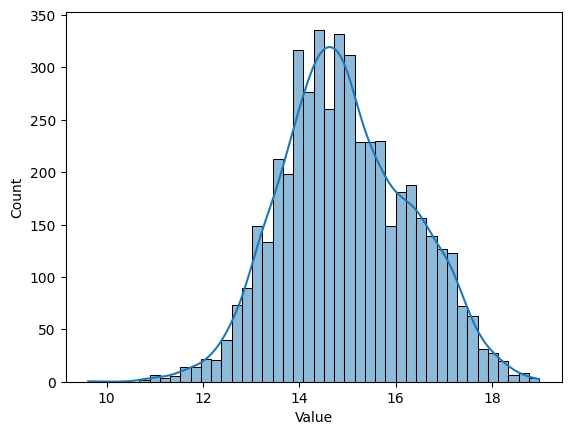

In [ ]:
sns.histplot(df['Value'], kde=True)

In [ ]:
sns.histplot(df['Wage'], kde=True)

<Axes: xlabel='Wage', ylabel='Count'>

<Axes: xlabel='Sliding tackle', ylabel='Count'>

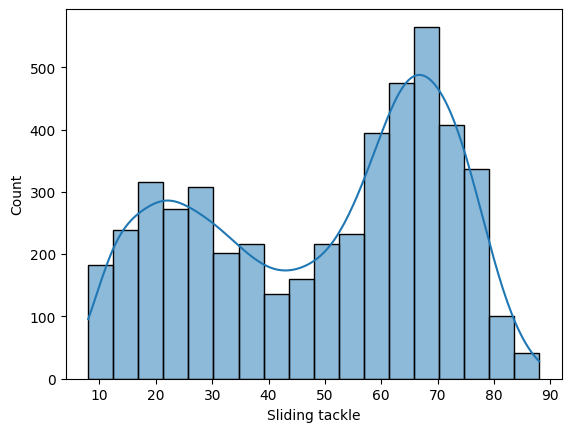

In [ ]:
sns.histplot(df['Sliding tackle'], kde=True)

## 3. Conversion of Categorical Features

In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                      Team      Value       Wage  \
0         84  Right                     Genoa  15.520259  10.203629   
1         86  Right      RC Strasbourg Alsace  16.618871  11.066654   
2         85  Right           Atlético Madrid  16.341239  10.491302   
3         82  Right  St Patrick's Athletic FC  13.910822   7.601402   
4         89  Right           Manchester City  17.966550  12.506181   

   Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  Reactions  \
0        191         75            65            69     62.0         70   
1        180         75            77            73     77.0         72   
2        173         75            84            85     82.0         76   
3        185         78            74            74     73.0         54   
4        181         75            67            67     75.0         92   

   Balance  Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0     54.0       66        75     79.0              267        59         29   
1     69.0       77        75     87.0              333        56         67   
2     82.0       78        79     86.0              341        63         75   
3     77.0       68        65     70.0              277        51         61   
4     78.0       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Compo

<Axes: xlabel='foot', ylabel='Value'>

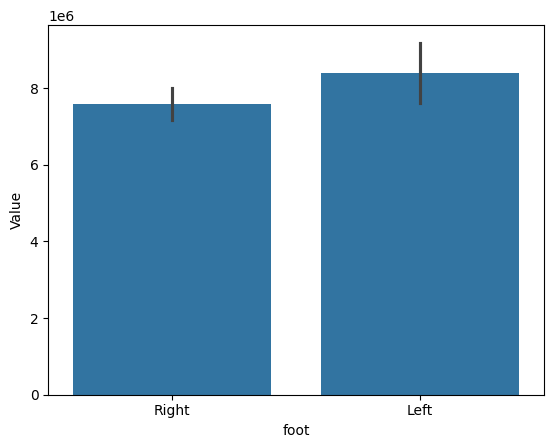

In [ ]:
sns.barplot(x='foot', y=np.exp(df['Value']), data=df)

In [ ]:
(np.exp(df['Value']) - 1).head()

0     5500000.0
1    16500000.0
2    12500000.0
3     1100000.0
4    63500000.0
Name: Value, dtype: float64

In [ ]:
sns.barplot(x='Best position', y=np.exp(df['Value']), data=df, estimator=np.mean)

<Axes: xlabel='Best position', ylabel='Value'>

In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                      Team      Value       Wage  \
0         84  Right                     Genoa  15.520259  10.203629   
1         86  Right      RC Strasbourg Alsace  16.618871  11.066654   
2         85  Right           Atlético Madrid  16.341239  10.491302   
3         82  Right  St Patrick's Athletic FC  13.910822   7.601402   
4         89  Right           Manchester City  17.966550  12.506181   

   Height_cm  Weight_kg  Acceleration  Sprint speed  Agility  Reactions  \
0        191         75            65            69     62.0         70   
1        180         75            77            73     77.0         72   
2        173         75            84            85     82.0         76   
3        185         78            74            74     73.0         54   
4        181         75            67            67     75.0         92   

   Balance  Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0     54.0       66        75     79.0              267        59         29   
1     69.0       77        75     87.0              333        56         67   
2     82.0       78        79     86.0              341        63         75   
3     77.0       68        65     70.0              277        51         61   
4     78.0       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Compo

In [ ]:
df['Team'].value_counts()

Team
Chelsea                                 40
Manchester City                         32
Manchester United                       31
Paris Saint-Germain                     31
AC Milan                                31
FC Barcelona                            31
Newcastle United                        30
Southampton                             30
Arsenal                                 30
Aston Villa                             30
Sporting CP                             29
Como                                    29
AS Monaco                               29
Burnley                                 28
Atlético Madrid                         28
Tottenham Hotspur                       28
SL Benfica                              27
Bayer 04 Leverkusen                     27
FC Bayern München                       27
Real Madrid                             27
VfB Stuttgart                           27
Ajax                                    27
Inter                                   27
Nottin

Let's implement one hot encoding for categorical variables. Additionally, we will group the teams that have fewer than 11 players in our dataset.

In [ ]:
team_counts = df['Team'].value_counts()

In [ ]:
low_teams = team_counts[team_counts < 11].index

In [ ]:
df['Team'] = df['Team'].apply(lambda x: 'Others' if x in low_teams else x)

In [ ]:
df.sample(10)

Name      ID  Age Best position  Best overall  Overall rating  \
1824         Vitinho  244661   24            RB            72              72   
2241     L. Torriani   72179   19            GK            60              60   
1560        K. Ayhan  207790   29           CDM            77              75   
1505  Welington Dano  230347   24            LB            81              81   
397      I. Zabarnyi  258781   21            CB            79              77   
1512         E. Riis  231616   26            ST            73              71   
4009      J. Wareham  271666   21            ST            63              61   
4533      K. Karataş  262607   20            LB            66              66   
2410       V. Musliu  266567   29            CB            68              68   
3321      Pablo Marí  206654   30            CB            75              75   

      Potential   foot               Team      Value       Wage  Height_cm  \
1824         77  Right            Burnley  15.009433  10.518700        175   
2241         76  Right           AC Milan  13.262127   9.680406        197   
1560         75  Right     Galatasaray SK  15.404746  10.621352        184   
1505         81   Left             Others  17.111347  10.621352        178   
397          83  Right    AFC Bournemouth  16.556351  10.621352        189   
1512         74  Right  Preston North End  14.731802  10.275086        190   
4009         72  Right             Others  13.527830   8.294300        177   
4533         70   Left             Others  13.910822   8.853808        182   
2410         68  Right             Others  13.815512   9.546884        187   
3321         75   Left              Monza  15.341567  10.203629        193   

      Weight_kg  Acceleration  Sprint speed  Agility  Reactions  Balance  \
1824         73            86            78     84.0         68     81.0   
2241         85            22            16     32.0         60     22.0   
1560         84            58            60     64.0         75     67.0   
1505         69            78            80     83.0         80     81.0   
397          80            56            68     64.0         76     56.0   
1512         83            65            79     65.0         70     56.0   
4009         73            71            70     71.0         56     78.0   
4533         74            72            77     73.0         64     70.0   
2410         80            69            71     67.0         67     64.0   
3321         87            49            59     42.0         71     31.0   

      Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
1824       75        62     75.0              255        67         33   
2241       26        48     42.0               83        10          5   
1560       71        80     79.0              313        71         54   
1505       89        68     77.0              327        82         51   
397        67        80     81.0              269        57         33   
1512       69        75     74.0              311        45         72   
4009       57        68     70.0              288        51         63   
4533       71        69     69.0              277        60         48   
2410       67        74     74.0              229        40         34   
3321       56        78     78.0              244        32         38   

      Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
1824                57             69     29.0          303         74   59.0   
2241                10             54      4.0           96         12   12.0   
1560                73             75     40.0          367         63   79.0   
1505                69             78     47.0          361         77   83.0   
397                 76             75     28.0          266         55   36.0   
1512                65             60     69.0          275         69   42.0   
4009                56             56     62.0

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

After considering various encoding methods for the 'Team' feature in my dataset, I have decided to apply target encoding. This involves calculating the mean market value for each club and then encoding each team with its corresponding mean market value.

In [ ]:
from sklearn.model_selection import KFold 
import joblib
import json

In [ ]:
df['Team_encoded'] = np.nan # create an empty column where cross-validation encoded values will be stored

In [ ]:
df.reset_index(drop=True, inplace=True)  # reset index to ensure continuous indices

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # set up 5-fold cross-validation, shuffle data for randomness
for train_idx, val_idx in kf.split(df):  # iterate through the splits
    train_df, val_df = df.iloc[train_idx], df.iloc[val_idx]  # split data into train and validation sets
    
    team_mean_cv = train_df.groupby('Team')['Value'].mean()
    df.loc[val_idx, 'Team_encoded'] = val_df['Team'].map(team_mean_cv)  # map each team's mean value to the validation set


In [ ]:
with open('team_target_encoding.json', 'w') as f:  # Save team target encoding
    json.dump(team_mean_cv.to_dict(), f)

In [ ]:
team_mean_cv

Team
1. FC Köln                  15.135231
1. FC Union Berlin          15.523757
1. FSV Mainz 05             15.134020
AC Milan                    16.053828
AEK Athens                  15.327782
AFC Bournemouth             15.771728
AS Monaco                   16.086161
AS Saint-Étienne            14.757234
Ajax                        15.082718
Al Ahli SFC                 15.769297
Al Ain                      14.775043
Al Hilal                    16.622378
Al Nassr                    16.701100
Alkmaar Zaanstreek          14.666469
Arsenal                     16.566219
Aston Villa                 15.861912
Atalanta                    16.131863
Athletic Club               16.265366
Atlético Madrid             16.303747
BSC Young Boys              14.610125
Bayer 04 Leverkusen         16.541677
Beşiktaş JK                 15.346734
Birmingham City             14.629905
Bologna                     15.990504
Borussia Dortmund           16.487555
Borussia Mönchengladbach    15.712185
Brentfo

In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                  Team      Value       Wage  Height_cm  \
0         84  Right                 Genoa  15.520259  10.203629        191   
1         86  Right  RC Strasbourg Alsace  16.618871  11.066654        180   
2         85  Right       Atlético Madrid  16.341239  10.491302        173   
3         82  Right                Others  13.910822   7.601402        185   
4         89  Right       Manchester City  17.966550  12.506181        181   

   Weight_kg  Acceleration  Sprint speed  Agility  Reactions  Balance  \
0         75            65            69     62.0         70     54.0   
1         75            77            73     77.0         72     69.0   
2         75            84            85     82.0         76     82.0   
3         78            74            74     73.0         54     77.0   
4         75            67            67     75.0         92     78.0   

   Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0       66        75     79.0              267        59         29   
1       77        75     87.0              333        56         67   
2       78        79     86.0              341        63         75   
3       68        65     70.0              277        51         61   
4       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Composure  Total power  Shot 

In [ ]:
cols = ['Best position']    

In [ ]:
best_position_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # instantiate one-hot encoder
  # ignore unknown categories in the validation set

In [ ]:
encoded_array = best_position_encoder.fit_transform(df[cols])  # fit and transform the training set

In [ ]:
encoded_df = pd.DataFrame(encoded_array, columns=best_position_encoder.get_feature_names_out(cols))  # convert to DataFrame

In [ ]:
encoded_df.head()

Best position_CAM  Best position_CB  Best position_CDM  Best position_CF  \
0                0.0               1.0                0.0               0.0   
1                0.0               0.0                0.0               0.0   
2                0.0               0.0                0.0               0.0   
3                0.0               0.0                0.0               0.0   
4                0.0               0.0                0.0               0.0   

   Best position_CM  Best position_GK  Best position_LB  Best position_LM  \
0               0.0               0.0               0.0               0.0   
1               1.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               1.0               0.0               0.0               0.0   

   Best position_LW  Best position_LWB  Best position_RB  Best position_RM  \
0               0.0                0.0               0.0               0.0   
1               0.0                0.0               0.0               0.0   
2               0.0                0.0               0.0               0.0   
3               0.0                0.0               0.0               0.0   
4               0.0                0.0               0.0               0.0   

   Best position_RW  Best position_RWB  Best position_ST  
0               0.0                0.0               0.0  
1               0.0                0.0               0.0  
2               0.0                0.0               1.0  
3               0.0                0.0               1.0  
4               0.0                0.0               0.0

In [ ]:
encoded_df.index = df.index

In [ ]:
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                  Team      Value       Wage  Height_cm  \
0         84  Right                 Genoa  15.520259  10.203629        191   
1         86  Right  RC Strasbourg Alsace  16.618871  11.066654        180   
2         85  Right       Atlético Madrid  16.341239  10.491302        173   
3         82  Right                Others  13.910822   7.601402        185   
4         89  Right       Manchester City  17.966550  12.506181        181   

   Weight_kg  Acceleration  Sprint speed  Agility  Reactions  Balance  \
0         75            65            69     62.0         70     54.0   
1         75            77            73     77.0         72     69.0   
2         75            84            85     82.0         76     82.0   
3         78            74            74     73.0         54     77.0   
4         75            67            67     75.0         92     78.0   

   Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0       66        75     79.0              267        59         29   
1       77        75     87.0              333        56         67   
2       78        79     86.0              341        63         75   
3       68        65     70.0              277        51         61   
4       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Composure  Total power  Shot 

In [ ]:
joblib.dump(best_position_encoder, 'position_encoder.pkl')

['position_encoder.pkl']

In [ ]:
print(best_position_encoder.get_feature_names_out())

['Best position_CAM' 'Best position_CB' 'Best position_CDM'
 'Best position_CF' 'Best position_CM' 'Best position_GK'
 'Best position_LB' 'Best position_LM' 'Best position_LW'
 'Best position_LWB' 'Best position_RB' 'Best position_RM'
 'Best position_RW' 'Best position_RWB' 'Best position_ST']


## 4. Contract Based Feature Engineering

In [ ]:
df["Years left"] = df["Contract End Year"] - 2025  # assuming data is from 2025
df.drop("Contract End Year", axis=1, inplace=True)

In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                  Team      Value       Wage  Height_cm  \
0         84  Right                 Genoa  15.520259  10.203629        191   
1         86  Right  RC Strasbourg Alsace  16.618871  11.066654        180   
2         85  Right       Atlético Madrid  16.341239  10.491302        173   
3         82  Right                Others  13.910822   7.601402        185   
4         89  Right       Manchester City  17.966550  12.506181        181   

   Weight_kg  Acceleration  Sprint speed  Agility  Reactions  Balance  \
0         75            65            69     62.0         70     54.0   
1         75            77            73     77.0         72     69.0   
2         75            84            85     82.0         76     82.0   
3         78            74            74     73.0         54     77.0   
4         75            67            67     75.0         92     78.0   

   Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0       66        75     79.0              267        59         29   
1       77        75     87.0              333        56         67   
2       78        79     86.0              341        63         75   
3       68        65     70.0              277        51         61   
4       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Composure  Total power  Shot 

## 5. Scaling Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

models like linear regression and neural networks perform **better when numerical features are scaled**.

we will apply **min-max scaling** (values between 0 and 1) to prevent **bias towards large numbers** .

In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                  Team      Value       Wage  Height_cm  \
0         84  Right                 Genoa  15.520259  10.203629        191   
1         86  Right  RC Strasbourg Alsace  16.618871  11.066654        180   
2         85  Right       Atlético Madrid  16.341239  10.491302        173   
3         82  Right                Others  13.910822   7.601402        185   
4         89  Right       Manchester City  17.966550  12.506181        181   

   Weight_kg  Acceleration  Sprint speed  Agility  Reactions  Balance  \
0         75            65            69     62.0         70     54.0   
1         75            77            73     77.0         72     69.0   
2         75            84            85     82.0         76     82.0   
3         78            74            74     73.0         54     77.0   
4         75            67            67     75.0         92     78.0   

   Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0       66        75     79.0              267        59         29   
1       77        75     87.0              333        56         67   
2       78        79     86.0              341        63         75   
3       68        65     70.0              277        51         61   
4       76        75     71.0              411        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0          282         66   51.0   
1                78             79     53.0          352         77   68.0   
2                69             72     62.0          313         76   56.0   
3                57             56     52.0          274         63   54.0   
4                55             94     83.0          447         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67              219   
1           52            77            78              227   
2           46            60            75               62   
3           51            43            63               68   
4           83            93            92              189   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68                 49         12            8        11.0   
1          78                 50          5           10        15.0   
2          77                 55          8           14         7.0   
3          56                 41         12           10         8.0   
4          75                 56         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8              277             48    42.0   
1              12            8              353             75    74.0   
2              14           12              313             76    71.0   
3               5            6              256             63    54.0   
4              10           13              406             88    94.0   

   Penalties  Composure  Total power  Shot 

In [ ]:
num_features = [
    "Total attacking", "Total skill", "Total defending", "Total mentality", "Total power", "Total goalkeeping"
]

scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(40, 30), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


In [ ]:
df.head()

Name      ID  Age Best position  Best overall  Overall rating  \
0   K. De Winter  265774   22            CB            74              72   
1  Andrey Santos  273018   20            CM            78              76   
2     G. Simeone  253396   21            ST            77              75   
3       M. Melia  276346   16            ST            64              62   
4   K. De Bruyne  192985   33            CM            89              89   

   Potential   foot                  Team      Value       Wage  Height_cm  \
0         84  Right                 Genoa  15.520259  10.203629        191   
1         86  Right  RC Strasbourg Alsace  16.618871  11.066654        180   
2         85  Right       Atlético Madrid  16.341239  10.491302        173   
3         82  Right                Others  13.910822   7.601402        185   
4         89  Right       Manchester City  17.966550  12.506181        181   

   Weight_kg  Acceleration  Sprint speed  Agility  Reactions  Balance  \
0         75            65            69     62.0         70     54.0   
1         75            77            73     77.0         72     69.0   
2         75            84            85     82.0         76     82.0   
3         78            74            74     73.0         54     77.0   
4         75            67            67     75.0         92     78.0   

   Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
0       66        75     79.0         0.559494        59         29   
1       77        75     87.0         0.726582        56         67   
2       78        79     86.0         0.746835        63         75   
3       68        65     70.0         0.584810        51         61   
4       76        75     71.0         0.924051        95         84   

   Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
0                72             66     41.0     0.567901         66   51.0   
1                78             79     53.0     0.740741         77   68.0   
2                69             72     62.0     0.644444         76   56.0   
3                57             56     52.0     0.548148         63   54.0   
4                55             94     83.0     0.975309         86   93.0   

   FK Accuracy  Long passing  Ball control  Total defending  \
0           34            64            67         0.801653   
1           52            77            78         0.834711   
2           46            60            75         0.152893   
3           51            43            63         0.177686   
4           83            93            92         0.677686   

   Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
0                   70               75            74.0             70   
1                   69               78            80.0             72   
2                   18               20            24.0             27   
3                   22               21            25.0             24   
4                   66               70            53.0             66   

   Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
0          68           0.091335         12            8        11.0   
1          78           0.093677          5           10        15.0   
2          77           0.105386          8           14         7.0   
3          56           0.072600         12           10         8.0   
4          75           0.107728         15           13         5.0   

   GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
0              10            8         0.593838             48    42.0   
1              12            8         0.806723             75    74.0   
2              14           12         0.694678             76    71.0   
3               5            6         0.535014             63    54.0   
4              10           13         0.955182             88    94.0   

   Penalties  Composure  Total power  Shot 

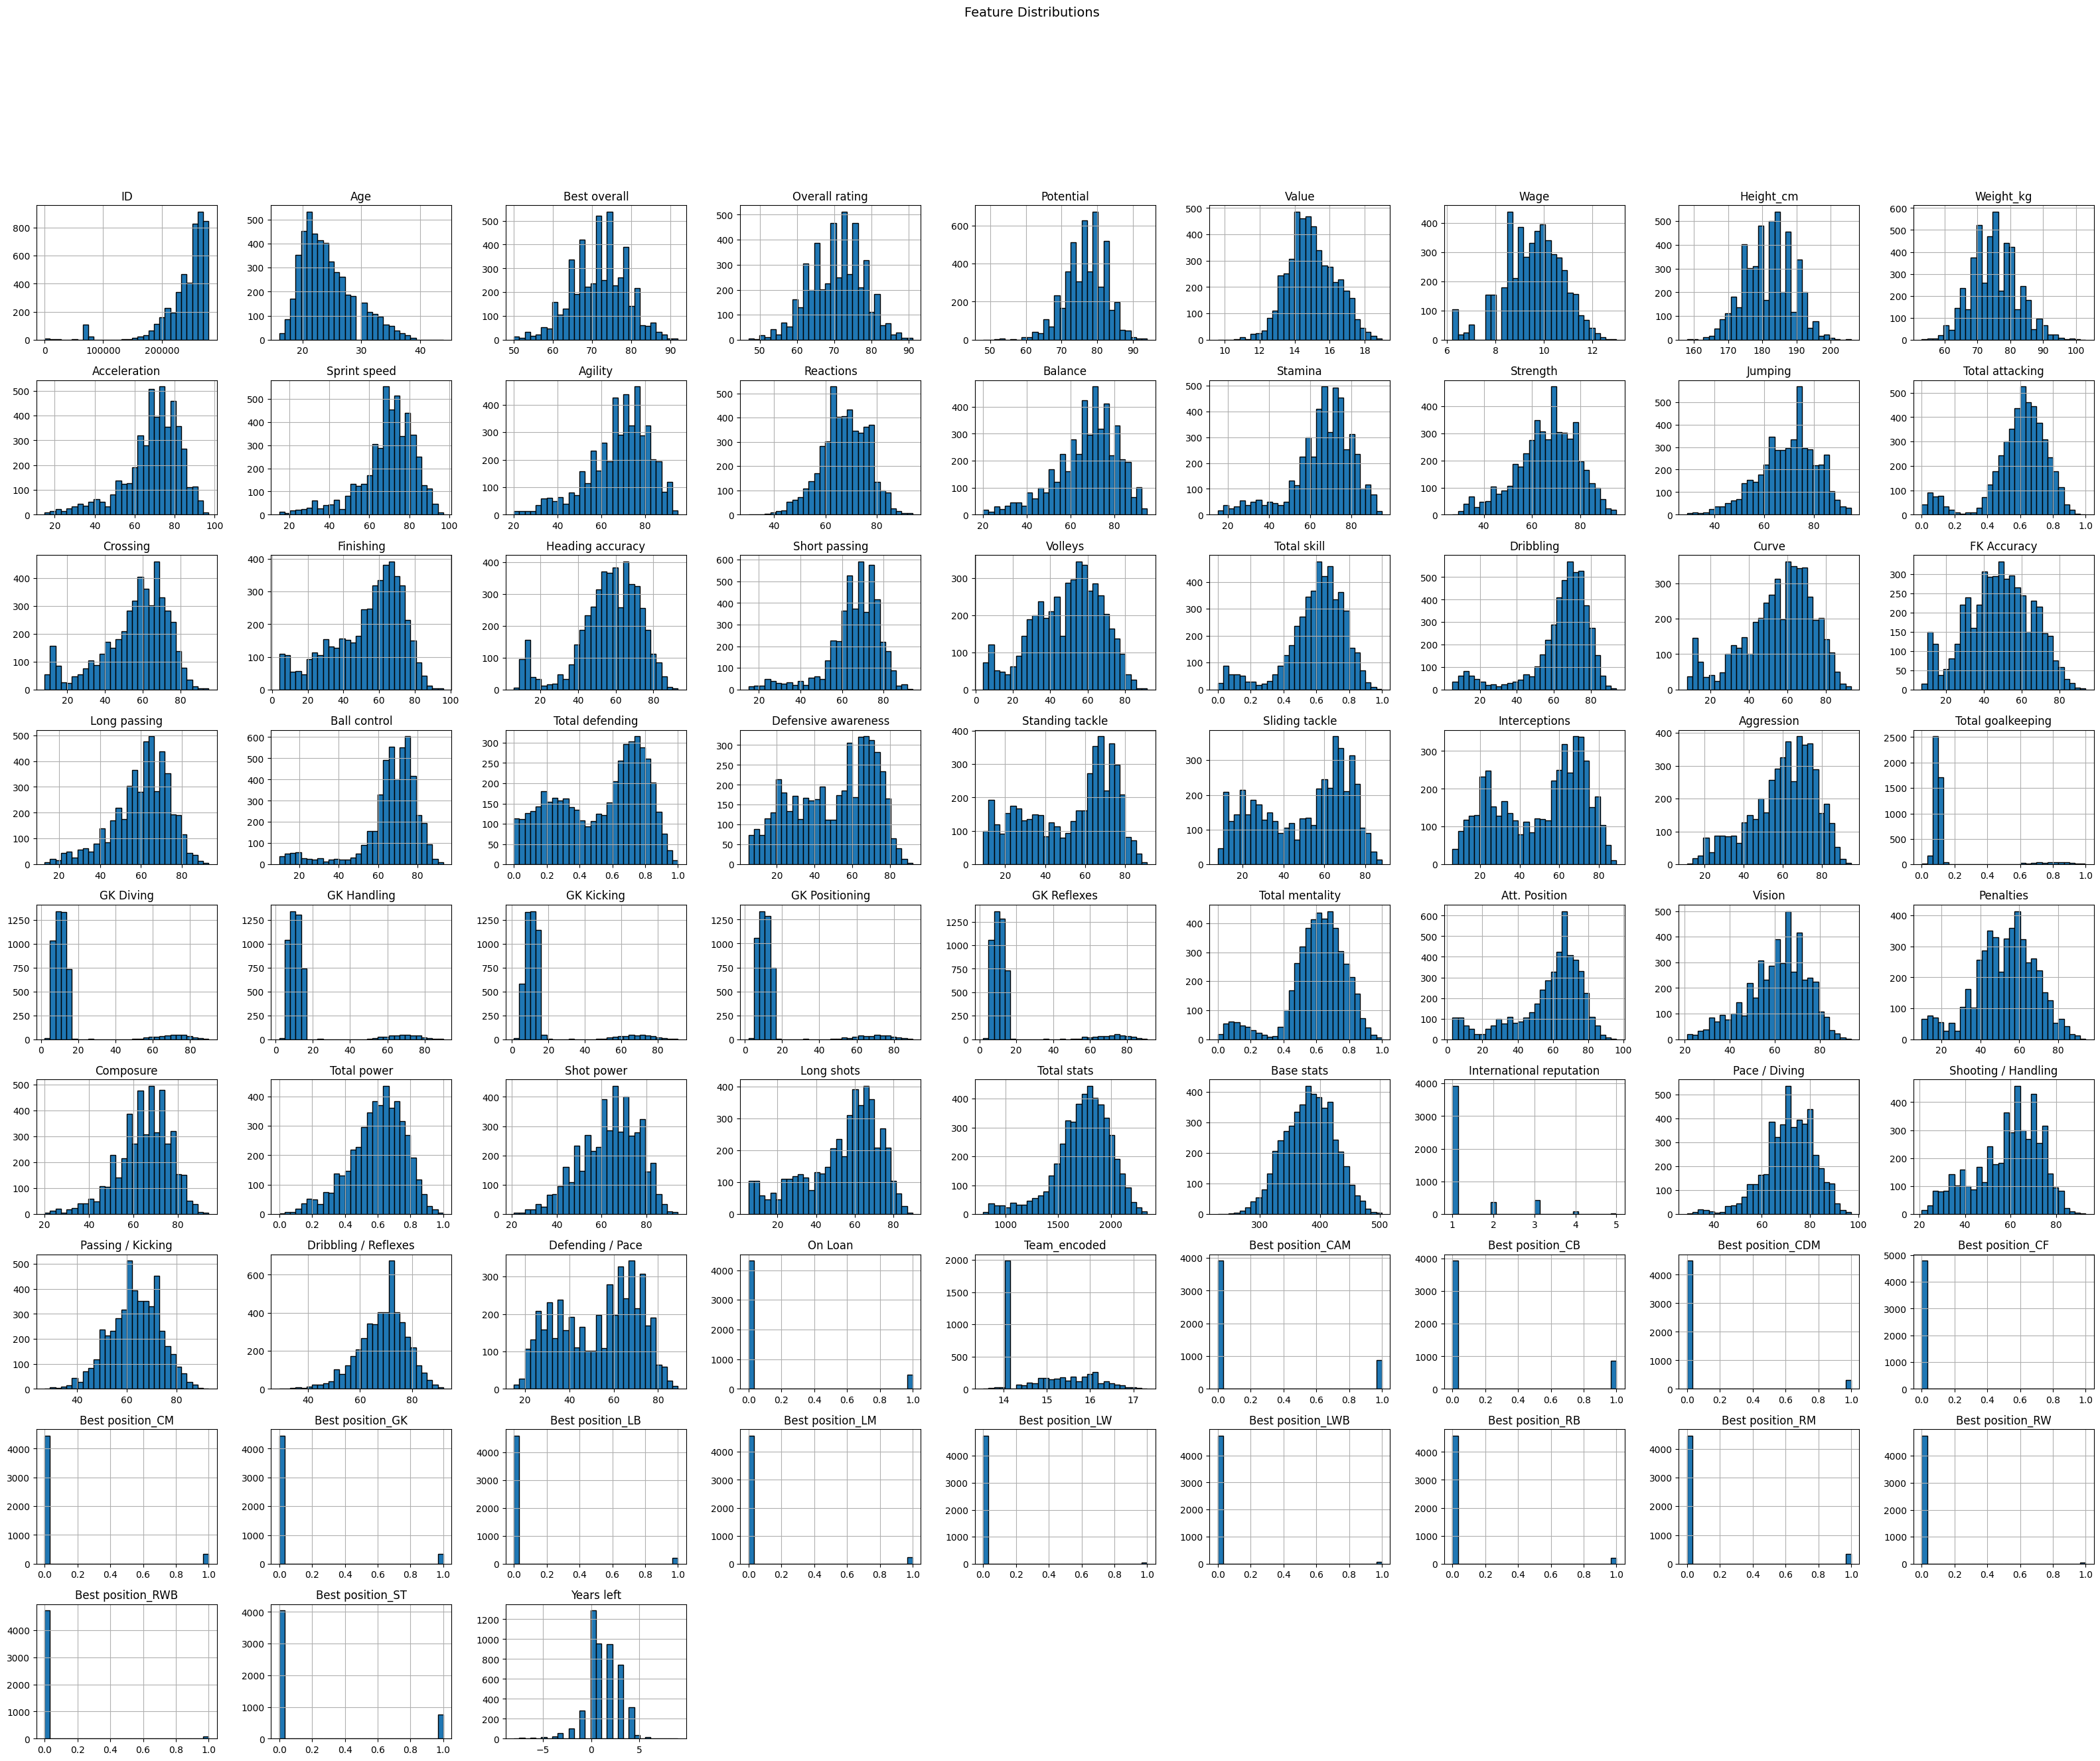

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(40, 30), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

## 5. Position Based Feature Engineering

right now, best position has many unique values like ST, LW, CM, CB, GK, etc. let's group them into broader categories first, like Attacker, midfielders and defenders

In [ ]:
# define position categories
def position_category(pos):
    if pos in ["ST", "CF", "LW", "RW"]:
        return "Forward"
    elif pos in ["CAM", "CM", "CDM", "RM", "LM"]:
        return "Midfielder"
    elif pos in ["CB", "RB", "LB", "RWB", "LWB"]:
        return "Defender"
    elif pos == "GK":
        return "Goalkeeper"
    else:
        return "Other"

# apply function
df["Position Category"] = df["Best position"].apply(position_category)

Here comes the real part when working with features: 
 players in different positions have different key attributes. let's create new features based on this.

In [ ]:
df["Forward Score"] = df[["Finishing", "Shot power", "Dribbling", "Acceleration", "Sprint speed"]].mean(axis=1)
df["Midfielder Score"] = df[["Short passing", "Long passing", "Vision", "Ball control", "Stamina"]].mean(axis=1)
df["Defender Score"] = df[["Defensive awareness", "Interceptions", "Standing tackle", "Sliding tackle", "Strength"]].mean(axis=1)
df["Goalkeeper Score"] = df[["GK Diving", "GK Reflexes", "GK Handling", "GK Positioning", "GK Kicking"]].mean(axis=1)

In [ ]:
df.sample(10)

Name      ID  Age Best position  Best overall  Overall rating  \
1980  Borja Iglesias  224179   31            ST            78              78   
399          L. Hall  266127   19           LWB            79              78   
1899       D. Kyereh  244112   28           CAM            72              72   
4158        P. Pagis  266099   21            ST            68              65   
2572      Aimar Oroz  258937   22           CAM            78              76   
2911         J. Kade  236627   24            LM            67              64   
4323   M. Ellertsson  264436   22           CAM            70              66   
4758     J. Pulskamp  256053   23            GK            64              64   
1798      K. Velasco  244772   25            LM            76              75   
4617         D. Rots  259563   22           CAM            74              72   

      Potential   foot              Team      Value       Wage  Height_cm  \
1980         78  Right          RC Celta  16.300417  10.434145        187   
399          84   Left  Newcastle United  16.811243  11.018646        179   
1899         72  Right       SC Freiburg  14.690980   9.998843        179   
4158         77  Right            Others  14.403298   8.517393        180   
2572         82  Right            Others  16.300417  10.203629        177   
2911         68   Left            Others  13.623140   8.294300        182   
4323         76   Left            Others  14.457365   8.987322        182   
4758         71  Right            Others  13.815512   8.006701        188   
1798         78   Left            Others  15.830414   8.517393        168   
4617         78   Left         FC Twente  15.150512   8.987322        180   

      Weight_kg  Acceleration  Sprint speed  Agility  Reactions  Balance  \
1980         86            64            65     56.0         80     67.0   
399          71            79            75     79.0         78     85.0   
1899         79            74            72     85.0         70     84.0   
4158         70            63            59     65.0         63     67.0   
2572         72            75            64     74.0         68     70.0   
2911         67            74            65     78.0         62     76.0   
4323         74            74            64     73.0         59     68.0   
4758         86            27            21     30.0         60     41.0   
1798         70            82            82     80.0         72     81.0   
4617         71            82            78     84.0         68     73.0   

      Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
1980       65        84     86.0         0.789873        50         79   
399        79        55     67.0         0.736709        81         60   
1899       56        58     68.0         0.708861        58         70   
4158       73        59     67.0         0.648101        53         68   
2572       78        65     74.0         0.746835        59         78   
2911       77        34     50.0         0.605063        59         54   
4323       39        61     66.0         0.670886        60         68   
4758       20        62     54.0         0.055696        13          9   
1798       73        48     59.0         0.718987        74         72   
4617       72        56     67.0         0.693671        69         66   

      Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
1980                80             76     73.0     0.693827         75   51.0   
399                 54             80     62.0     0.809877         78   80.0   
1899                59             71     68.0     0.693827         77   60.0   
4158                67             65     49.0     0.627160         66   54.0   
2572                65             80     59.0     0.740741         79   59.0   
2911                53             69     50.0     0.624691         66   59.0   
4323                53             70     60.0     0.6790

In [ ]:
import seaborn as sns

important_features = ['Value', 'Overall rating', 'Potential', 'Age', 'Wage']
sns.pairplot(df[important_features])
plt.show()


C:\Users\samir\AppData\Local\Temp\ipykernel_8544\1727605754.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Best position'], y=df['Value'], palette="coolwarm")


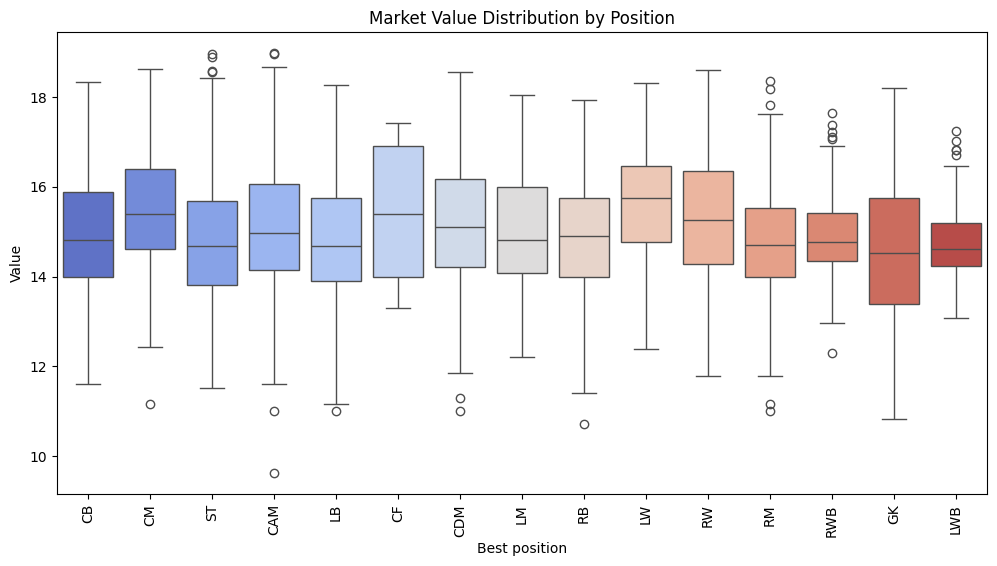

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Best position'], y=df['Value'], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Market Value Distribution by Position")
plt.show()


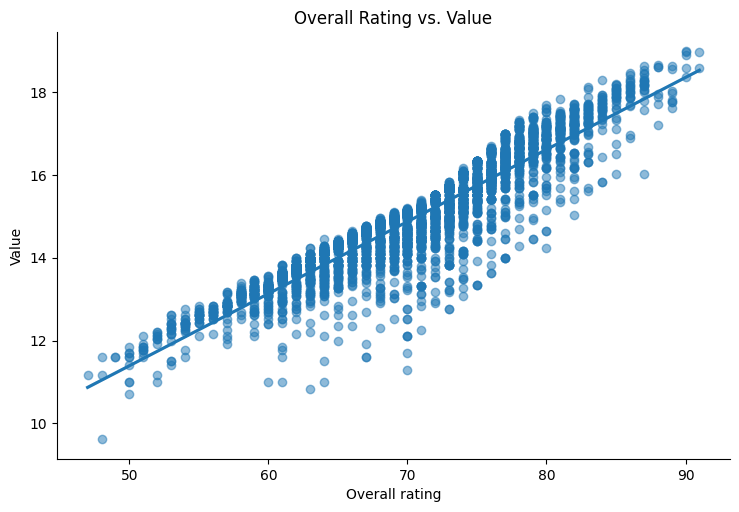

In [ ]:
sns.lmplot(x="Overall rating", y="Value", data=df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title("Overall Rating vs. Value")
plt.show()


In [ ]:
df.sample(5)

Name      ID  Age Best position  Best overall  Overall rating  \
4793       K. Hurst  256815   22            RM            61              60   
4233   Z. El Sheiwi  264821   20            LM            58              56   
44       J. Alvarez  246191   24           CAM            87              84   
1189  R. Bensebaini  224196   29            LB            79              79   
2123       S. Arias  204259   31            RB            75              75   

      Potential   foot               Team      Value       Wage  Height_cm  \
4793         66  Right             Others  12.899222   9.305741        178   
4233         71   Left             Others  12.691584   8.853808        180   
44           88  Right    Atlético Madrid  17.926384  11.407576        170   
1189         79   Left  Borussia Dortmund  16.556351  10.799596        187   
2123         75  Right             Others  15.226498   8.987322        178   

      Weight_kg  Acceleration  Sprint speed  Agility  Reactions  Balance  \
4793         72            79            76     76.0         56     72.0   
4233         77            77            72     67.0         45     73.0   
44           71            86            85     87.0         86     87.0   
1189         82            71            79     67.0         76     67.0   
2123         72            77            77     76.0         73     73.0   

      Stamina  Strength  Jumping  Total attacking  Crossing  Finishing  \
4793       69        49     50.0         0.501266        54         53   
4233       30        58     65.0         0.458228        56         30   
44         85        70     83.0         0.886076        77         86   
1189       72        78     88.0         0.792405        73         72   
2123       77        65     80.0         0.668354        72         51   

      Heading accuracy  Short passing  Volleys  Total skill  Dribbling  Curve  \
4793                35             54     48.0     0.538272         61   54.0   
4233                50             51     40.0     0.518519         66   58.0   
44                  72             82     79.0     0.898765         85   87.0   
1189                81             76     57.0     0.735802         78   67.0   
2123                72             72     43.0     0.679012         74   55.0   

      FK Accuracy  Long passing  Ball control  Total defending  \
4793           49            47            59         0.280992   
4233           29            46            63         0.553719   
44             80            77            87         0.561983   
1189           62            68            75         0.904959   
2123           54            72            72         0.797521   

      Defensive awareness  Standing tackle  Sliding tackle  Interceptions  \
4793                   32               28            33.0             23   
4233                   46               56            57.0             52   
44                     60               55            46.0             52   
1189                   75               83            86.0             75   
2123                   73               74            71.0             72   

      Aggression  Total goalkeeping  GK Diving  GK Handling  GK Kicking  \
4793          33           0.086651          7            5        12.0   
4233          57           0.084309         10           13         8.0   
44            86           0.081967          6           10         8.0   
1189          80           0.103044          6           13        14.0   
2123          79           0.131148         14            7        14.0   

      GK Positioning  GK Reflexes  Total mentality  Att. Position  Vision  \
4793              12           11         0.445378             55    56.0   
4233               8            7         0.529412             50    57.0   
44                15            6         0.885154             84    81.0   
1189               7           14         0.851541       

In [ ]:
df.drop(columns=['Best overall', 'Overall rating'], inplace=True)

In [ ]:
df.to_csv("../data/processed/data_after_feature_engineering.csv", index=False)

In [ ]:
df.head()

Name      ID  Age Best position  Potential   foot  \
0   K. De Winter  265774   22            CB         84  Right   
1  Andrey Santos  273018   20            CM         86  Right   
2     G. Simeone  253396   21            ST         85  Right   
3       M. Melia  276346   16            ST         82  Right   
4   K. De Bruyne  192985   33            CM         89  Right   

                   Team      Value       Wage  Height_cm  Weight_kg  \
0                 Genoa  15.520259  10.203629        191         75   
1  RC Strasbourg Alsace  16.618871  11.066654        180         75   
2       Atlético Madrid  16.341239  10.491302        173         75   
3                Others  13.910822   7.601402        185         78   
4       Manchester City  17.966550  12.506181        181         75   

   Acceleration  Sprint speed  Agility  Reactions  Balance  Stamina  Strength  \
0            65            69     62.0         70     54.0       66        75   
1            77            73     77.0         72     69.0       77        75   
2            84            85     82.0         76     82.0       78        79   
3            74            74     73.0         54     77.0       68        65   
4            67            67     75.0         92     78.0       76        75   

   Jumping  Total attacking  Crossing  Finishing  Heading accuracy  \
0     79.0         0.559494        59         29                72   
1     87.0         0.726582        56         67                78   
2     86.0         0.746835        63         75                69   
3     70.0         0.584810        51         61                57   
4     71.0         0.924051        95         84                55   

   Short passing  Volleys  Total skill  Dribbling  Curve  FK Accuracy  \
0             66     41.0     0.567901         66   51.0           34   
1             79     53.0     0.740741         77   68.0           52   
2             72     62.0     0.644444         76   56.0           46   
3             56     52.0     0.548148         63   54.0           51   
4             94     83.0     0.975309         86   93.0           83   

   Long passing  Ball control  Total defending  Defensive awareness  \
0            64            67         0.801653                   70   
1            77            78         0.834711                   69   
2            60            75         0.152893                   18   
3            43            63         0.177686                   22   
4            93            92         0.677686                   66   

   Standing tackle  Sliding tackle  Interceptions  Aggression  \
0               75            74.0             70          68   
1               78            80.0             72          78   
2               20            24.0             27          77   
3               21            25.0             24          56   
4               70            53.0             66          75   

   Total goalkeeping  GK Diving  GK Handling  GK Kicking  GK Positioning  \
0           0.091335         12            8        11.0              10   
1           0.093677          5           10        15.0              12   
2           0.105386          8           14         7.0              14   
3           0.072600         12           10         8.0               5   
4           0.107728         15           13         5.0              10   

   GK Reflexes  Total mentality  Att. Position  Vision  Penalties  Composure  \
0            8         0.593838             48    42.0       49.0       64.0   
1            8         0.806723             75    74.0       54.0       78.0   
2           12         0.694678             76    71.0       62.0       62.0   
3            6         0.535014             63    54.0       59.0       63.0   
4           13         0.955182             88    94.0       83.0       88.0   

   Total power  Shot power  Long shots  Total stats  Base stats  \
0     0.588424          